<a href="https://colab.research.google.com/github/rahulkashyap14298/about-us/blob/master/notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os

In [3]:
my_dir="/content/drive/My Drive/electronic-research/electronic-recognition"

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
img_counter=[]
img_counter.append(10)

In [5]:
predictor = load_learner(my_dir)

In [6]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

In [7]:
my_image="/content/drive/My Drive/testdata"

In [8]:
all_test_images=os.listdir(my_image)

In [9]:
print(all_test_images)

['00000518.jpg', '00000505.jpg', '00000459.jpg', '00000540.jpg', '00000433.jpg', '00000447.jpg', '00000486.jpg', '00000507.jpg', '00000426.jpg', '00000522.jpg', '00000504.jpg', '00000445.jpg', '00000473.jpg', '00000474.jpg', '00000506.jpg', '00000480.jpg', '00000425.jpg', '00000517.jpg', '00000472.jpg', '00000510.jpg', '00000531.jpg', '00000462.jpg', '00000481.jpg', '00000432.jpg', '00000461.jpg', '00000520.jpg', '00000484.jpg', '00000497.jpg', '00000496.jpg', '00000530.jpg', '00000460.jpg', '00000434.jpg', '00000448.jpg', '00000533.jpg', '00000519.jpg', '00000532.jpg', '00000446.jpg', '00000485.jpg', '00000493.jpg', '00000534.jpg', '00000541.jpg', '00000471.jpg', '00000528.jpg', '00000495.jpg', '00000469.jpg', '00000529.jpg', '00000542.jpg', '00000483.jpg', '00000508.jpg', '00000516.jpg', '00000470.jpg', '00000498.jpg', '00000521.jpg', '00000509.jpg', '00000444.jpg', '00000482.jpg', '00000494.jpg', '00000492.jpg', '00000456.jpg', '00000468.jpg', '00000458.jpg', '00000449.jpg', '000005

fan


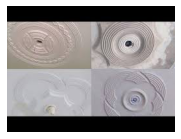

In [10]:
idx=45
print(my_predictor("/content/drive/My Drive/testdata/"+all_test_images[idx]))
img = open_image("/content/drive/My Drive/testdata/"+all_test_images[idx])
img.show()

In [11]:
import cv2
test_files=os.listdir(my_image)
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread(my_image+"/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (255, 0, 0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [17]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 -

In [18]:
!pip install -U kora
from kora.drive import upload_public

In [21]:
url = upload_public('my_final_output.mp4')

In [22]:
url


'https://drive.google.com/uc?id=1BQIZWHxnWXnpf3QCgv7pBeRVNZbIkZbP'

In [23]:

from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")